# 독버섯 분류회귀 내 방식

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

df = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/mushrooms.csv")
pd.DataFrame(df , columns = ["cap-shape" , "cap-surface" , "cap-color" , "bruises" , "odor" , "gill-attachment" , "gill-spacing" , "gill-size" , "gill-color" , "stalk-shape" , "stalk-root" , "stalk-surface-above-ring" , "stalk-surface-below-ring" , "stalk-color-above-ring" , "stalk-color-below-ring" , "veil-type" , "veil-color" , "ring-number" , "ring-type" , "spore-print-color" , "population" , "habitat"])
data = pd.DataFrame(columns = df.columns , data = LabelEncoder().fit_transform(df.values.flatten()).reshape(df.shape))
 
Dataset = data.values
X = Dataset[: , 1:].astype(float)
dataset = df.values
Y_obj = dataset[: , 0]
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)
model = Sequential()
model.add(Dense(30 , input_dim = 22 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(2 , activation = "softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
model.fit(X , Y_encoded , epochs = 10)
model.summary()

print("\nAccuracy : " , model.evaluate(X , Y_encoded)[1])

Epoch 1/10
254/254 [==============================] - 2s 6ms/step - loss: 0.5356 - accuracy: 0.8669
Epoch 2/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0826 - accuracy: 0.9755
Epoch 3/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0422 - accuracy: 0.9904
Epoch 4/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0227 - accuracy: 0.9968
Epoch 5/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0132 - accuracy: 0.9985
Epoch 6/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0087 - accuracy: 0.9989
Epoch 7/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0056 - accuracy: 0.9996
Epoch 8/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0045 - accuracy: 0.9993
Epoch 9/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0033 - accuracy: 0.9999
Epoch 10/10
254/254 [==============================] - 2s 6ms/step - loss: 0.0023 - accuracy: 1.0000

In [8]:
# 독버섯 이진분류
import pandas as pd

df = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/mushrooms.csv")

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col]) # <==
    
import matplotlib.pyplot as plt

#속성 클래스 다른 분류 방법
# dataset = df.values
# x = dataset[:  , 1 :23].astype(float)
# y = dataset[: , 0]

y = df["class"].values # <== 클래스 열의 value만 가져옴
# drop함수로 대상 열은 떨어트리고 나머지 열의 value들을 가져옴
x = df.drop(["class"] , axis = 1) # <== class 열만 빼고 가져옴
x = x.values

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

seed = 0

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2  ,random_state = seed)
print("x_train.shape" , x_train.shape)
print("x_test.shape" , x_test.shape)
print("y_train.shape" , y_train.shape)
print("y_test.shape" , y_test.shape)
print(y_test[0:5])

model = Sequential()
model.add(Dense(48 , input_dim = 22 , activation = "relu"))
model.add(Dense(24 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(x_train , y_train , epochs = 25 , batch_size = 32)
model.summary()

model.evaluate(x_test , y_test)



x_train.shape (6499, 22)
x_test.shape (1625, 22)
y_train.shape (6499,)
y_test.shape (1625,)
[1 0 0 0 0]
Epoch 1/25
204/204 [==============================] - 2s 8ms/step - loss: 0.3262 - accuracy: 0.8638
Epoch 2/25
204/204 [==============================] - 2s 8ms/step - loss: 0.1689 - accuracy: 0.9415
Epoch 3/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0980 - accuracy: 0.9695
Epoch 4/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0527 - accuracy: 0.9846
Epoch 5/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0296 - accuracy: 0.9917
Epoch 6/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0167 - accuracy: 0.9957
Epoch 7/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 8/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0097 - accuracy: 0.9978
Epoch 9/25
204/204 [==============================] - 2s 8ms/step - loss: 0.0046 - accuracy: 0.9

[6.46679472993128e-05, 1.0]

In [17]:
# 독버섯 다항 분류
import pandas as pd

df = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/mushrooms.csv")

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# columns를 찍으면 각 열의 이름들이 나오는데 그 column의 이름들은 남겨놓고
# value들만 문자열에서 숫자형으로 변경
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col]) # <==
    
import matplotlib.pyplot as plt

#속성 클래스 다른 분류 방법
# dataset = df.values
# x = dataset[:  , 1 :23].astype(float)
# y = dataset[: , 0]

y = df["class"].values # <== 클래스 열의 value만 가져옴
# drop함수로 대상 열은 떨어트리고 나머지 열의 value들을 가져옴
# x = df.drop(["class"] , axis = 1) # <== class 열만 빼고 가져옴
# x = x.values

# 이런방식으로 한줄로 써도 가능함
x = df.drop(["class"] , axis = 1).values

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

seed = 0

# 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2  ,random_state = seed)
print("x_train.shape" , x_train.shape)
print("x_test.shape" , x_test.shape)
print("y_train.shape" , y_train.shape)
print("y_test.shape" , y_test.shape)

y_train = tf.keras.utils.to_categorical(y_train , num_classes = 2)
y_test = tf.keras
.utils.to_categorical(y_test , num_classes = 2)

print("====to categorical 이후==========")
print("y_train.shape = " , y_train.shape)
print("y_test.shape = " , y_test.shape)
print(y_test[0:5])

model = Sequential()
model.add(Dense(48 , input_dim = 22 , activation = "relu"))
model.add(Dense(24 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(2 , activation = "softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(x_train , y_train , epochs = 25 , batch_size = 32)
model.summary()

model.evaluate(x_test , y_test)


x_train.shape (6499, 22)
x_test.shape (1625, 22)
y_train.shape (6499,)
y_test.shape (1625,)
====to categorical 이후==========
y_train.shape =  (6499, 2)
y_test.shape =  (1625, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Epoch 1/25
204/204 [==============================] - 2s 7ms/step - loss: 0.3134 - accuracy: 0.8674
Epoch 2/25
204/204 [==============================] - 1s 7ms/step - loss: 0.1202 - accuracy: 0.9589
Epoch 3/25
204/204 [==============================] - 1s 7ms/step - loss: 0.0537 - accuracy: 0.9852
Epoch 4/25
204/204 [==============================] - 1s 7ms/step - loss: 0.0271 - accuracy: 0.9926
Epoch 5/25
204/204 [==============================] - 1s 7ms/step - loss: 0.0139 - accuracy: 0.9975
Epoch 6/25
204/204 [==============================] - 1s 7ms/step - loss: 0.0069 - accuracy: 0.9994
Epoch 7/25
204/204 [==============================] - 1s 7ms/step - loss: 0.0043 - accuracy: 0.9995
Epoch 8/25
204/204 [==============================] - 1s 7ms/step - loss: 0.0

[9.173806029139087e-05, 1.0]

In [44]:
# 단층분류문제인데 다층분류를 해버린 광물캐기 데이터
df = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/sonar.csv" , header = None)

dataset = df.values

# astype = 내가 가져온 자료들이 실수형이다라는것을 지정해주는 것 
x = dataset[: , :60].astype(float)
Y_obj = dataset[: , 60]

e = LabelEncoder()
e.fit(Y_obj)
y = e.transform(Y_obj)
# keras.utils.to~ 를 하면 1차원 배열에서 2차원 배열로 값이 변경되고 
# 다중분류가 되어 출력층의 개수는 변경시킨 변수의 인덱스의 수가 된다.
# Y_encoded = tf.keras.utils.to_categorical(Y_obj)

model = Sequential()
model.add(Dense(30 , input_dim = 60 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
# model.add(Dense(30 , activation = "relu"))
# model.add(Dense(30 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
model.fit(x , y , epochs = 1000 , batch_size = 100 , verbose = 1)
model.summary()

# 정확도가 높다는건 rule기반으로도 코드를 작성할 수 있다는 뜻임
print("\nAccuracy %.4f" %(model.evaluate(x , y)[1] * 100))


Epoch 1/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.7086 - accuracy: 0.5337
Epoch 2/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6972 - accuracy: 0.5337
Epoch 3/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.5337
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.5337
Epoch 5/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.5337
Epoch 6/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.6781 - accuracy: 0.5337
Epoch 7/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6752 - accuracy: 0.5337
Epoch 8/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6720 - accuracy: 0.5385
Epoch 9/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6682 - accuracy: 0.5769
Epoch 10/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.6657 - accuracy: 0.6058
Epoch 11/1000
3/3 

3/3 [==============================] - 0s 8ms/step - loss: 0.3040 - accuracy: 0.8798
Epoch 166/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3114 - accuracy: 0.8702
Epoch 167/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3168 - accuracy: 0.8558
Epoch 168/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3028 - accuracy: 0.8702
Epoch 169/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2931 - accuracy: 0.8846
Epoch 170/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2976 - accuracy: 0.8798
Epoch 171/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.2925 - accuracy: 0.8846
Epoch 172/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2996 - accuracy: 0.8894
Epoch 173/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.3001 - accuracy: 0.8798
Epoch 174/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2903 - accuracy: 0.8942
Epoch 175/1000


3/3 [==============================] - 0s 7ms/step - loss: 0.2100 - accuracy: 0.9327
Epoch 248/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2122 - accuracy: 0.9375
Epoch 249/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2141 - accuracy: 0.9231
Epoch 250/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.2171 - accuracy: 0.9183
Epoch 251/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2095 - accuracy: 0.9231
Epoch 252/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2101 - accuracy: 0.9135
Epoch 253/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2110 - accuracy: 0.9087
Epoch 254/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2031 - accuracy: 0.9279
Epoch 255/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2077 - accuracy: 0.9327
Epoch 256/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2196 - accuracy: 0.9087
Epoch 257/1000


3/3 [==============================] - 0s 8ms/step - loss: 0.1512 - accuracy: 0.9615
Epoch 330/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.1665 - accuracy: 0.9327
Epoch 331/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.1594 - accuracy: 0.9327
Epoch 332/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.1515 - accuracy: 0.9567
Epoch 333/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.1518 - accuracy: 0.9567
Epoch 334/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.1468 - accuracy: 0.9615
Epoch 335/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.1495 - accuracy: 0.9519
Epoch 336/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.1519 - accuracy: 0.9471
Epoch 337/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.1473 - accuracy: 0.9615
Epoch 338/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.1464 - accuracy: 0.9567
Epoch 339/1000


3/3 [==============================] - 0s 8ms/step - loss: 0.1044 - accuracy: 0.9808
Epoch 412/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.1015 - accuracy: 0.9615
Epoch 413/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.1267 - accuracy: 0.9615
Epoch 414/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.1224 - accuracy: 0.9663
Epoch 415/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0992 - accuracy: 0.9663
Epoch 416/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0965 - accuracy: 0.9712
Epoch 417/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0962 - accuracy: 0.9712
Epoch 418/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0959 - accuracy: 0.9663
Epoch 419/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.0949 - accuracy: 0.9760
Epoch 420/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0936 - accuracy: 0.9712
Epoch 421/1000


3/3 [==============================] - 0s 11ms/step - loss: 0.0693 - accuracy: 0.9808
Epoch 494/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0692 - accuracy: 0.9760
Epoch 495/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0640 - accuracy: 0.9856
Epoch 496/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0641 - accuracy: 0.9904
Epoch 497/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0622 - accuracy: 0.9856
Epoch 498/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0608 - accuracy: 0.9904
Epoch 499/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0748 - accuracy: 0.9808
Epoch 500/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0751 - accuracy: 0.9856
Epoch 501/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0614 - accuracy: 0.9952
Epoch 502/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0692 - accuracy: 0.9952
Epoch 503/1000

3/3 [==============================] - 0s 7ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 657/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0246 - accuracy: 1.0000
Epoch 658/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 659/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 660/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 661/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 662/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 663/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 1.0000
Epoch 664/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 665/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 666/1000


3/3 [==============================] - 0s 7ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 739/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 740/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 741/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0172 - accuracy: 1.0000
Epoch 742/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0159 - accuracy: 1.0000
Epoch 743/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 744/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0174 - accuracy: 1.0000
Epoch 745/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 1.0000
Epoch 746/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 747/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 748/1000


3/3 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 821/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 822/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 1.0000
Epoch 823/1000
3/3 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 1.00 - 0s 8ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 824/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 825/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 826/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 827/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 828/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 829/1000
3/3 [==============================] - 0s 8ms/step - loss:

3/3 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 984/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 985/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 986/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 987/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 988/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 989/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 990/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 991/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 992/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 993/1000


In [25]:
print(dataset)

[[0.02 0.0371 0.0428 ... 0.009 0.0032 'R']
 [0.0453 0.0523 0.0843 ... 0.0052 0.0044 'R']
 [0.0262 0.0582 0.1099 ... 0.0095 0.0078 'R']
 ...
 [0.0522 0.0437 0.018 ... 0.0077 0.0031 'M']
 [0.0303 0.0353 0.049 ... 0.0036 0.0048 'M']
 [0.026 0.0363 0.0136 ... 0.0061 0.0115 'M']]


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

과적합은 테스트셋과 학습셋이 중복될때 생기기도 함

딥러닝을 진행하는 동안에 과적합에 빠지지 않게 늘 주의해야 한다.

신경망을 만들어 x개의 샘플로 학습을 진행한 후 이 학습의 결과를 저장
=> 이렇게 저장된 파일을 "모델"이라고 부름 

은닉층이 늘어날수록 학습셋의 예측률이 점점 올라가다가 결국에는 24개의 층에 이르면 
100% 예측율을 보임 

정확한 표현은 train / vailddation / Test
머신러닝 모델에 train데이터를 100% 학습시킨 후 test데이터에 모델을 적용하는
것이 정확한 순서이므로 validation을 사용 

In [46]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
df = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/sonar.csv" , header = None)

x = dataset[: , :60].astype(float)
Y_obj = dataset[: , 60]

e = LabelEncoder()
e.fit(Y_obj)
y = e.transform(Y_obj)

# train_test_split를 할때 x , y값에는 최종적으로 train에 넣을 x ,y값을 넣어주어야 한다.
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = seed)

model = Sequential()
model.add(Dense(30 , input_dim = 60 , activation = "relu"))
model.add(Dense(30 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
model.fit(x_train , y_train , epochs = 1000 , batch_size = 100 , verbose = 1)
model.summary()

print("\n Train Accuracy : %.4f" % (model.evaluate(x_train , y_train)[1]))
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test , y_test)[1]))

Epoch 1/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.7000 - accuracy: 0.5655
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6915 - accuracy: 0.5448
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6851 - accuracy: 0.5586
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6804 - accuracy: 0.5931
Epoch 5/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.6768 - accuracy: 0.5862
Epoch 6/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.6737 - accuracy: 0.5793
Epoch 7/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.6708 - accuracy: 0.6000
Epoch 8/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.6684 - accuracy: 0.6000
Epoch 9/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6662 - accuracy: 0.6207
Epoch 10/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6640 - accuracy: 0.6069
Epoch 11/1000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.1876 - accuracy: 0.9310
Epoch 166/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1827 - accuracy: 0.9586
Epoch 167/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1843 - accuracy: 0.9448
Epoch 168/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1858 - accuracy: 0.9241
Epoch 169/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.1782 - accuracy: 0.9655
Epoch 170/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1802 - accuracy: 0.9517
Epoch 171/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1868 - accuracy: 0.9310
Epoch 172/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1819 - accuracy: 0.9310
Epoch 173/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1745 - accuracy: 0.9517
Epoch 174/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.1739 - accuracy: 0.9517
Epoch 175/1000


2/2 [==============================] - 0s 9ms/step - loss: 0.0817 - accuracy: 1.0000
Epoch 248/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0805 - accuracy: 1.0000
Epoch 249/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0799 - accuracy: 1.0000
Epoch 250/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0789 - accuracy: 1.0000
Epoch 251/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.0790 - accuracy: 1.0000
Epoch 252/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0780 - accuracy: 1.0000
Epoch 253/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0775 - accuracy: 1.0000
Epoch 254/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0774 - accuracy: 1.0000
Epoch 255/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.0751 - accuracy: 1.0000
Epoch 256/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0737 - accuracy: 1.0000
Epoch 257/100

2/2 [==============================] - 0s 9ms/step - loss: 0.0348 - accuracy: 1.0000
Epoch 330/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0342 - accuracy: 1.0000
Epoch 331/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0343 - accuracy: 1.0000
Epoch 332/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0340 - accuracy: 1.0000
Epoch 333/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 334/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 1.0000
Epoch 335/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0330 - accuracy: 1.0000
Epoch 336/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0326 - accuracy: 1.0000
Epoch 337/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0322 - accuracy: 1.0000
Epoch 338/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0320 - accuracy: 1.0000
Epoch 339/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 492/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 493/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 494/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 495/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 496/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 497/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 498/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 499/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 1.0000
Epoch 500/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 501/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 574/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 575/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 576/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 577/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 578/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 579/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 580/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 581/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 582/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 583/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 656/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 657/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 658/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 659/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 660/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 661/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 662/1000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 663/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 664/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 665/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 738/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 739/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 740/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 741/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 742/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 743/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 744/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 745/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 746/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 747/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 820/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 821/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 822/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 823/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 824/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 825/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 826/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 827/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 828/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 829/1000


2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 902/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 903/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 904/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 905/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 906/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 907/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 908/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 909/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 910/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 911/1000


In [92]:
from tensorflow.keras.models import load_model
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/iris.csv" , names = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width" , "species"])

dataset = df.values

x = dataset[: , :4].astype(float)
y_obj = dataset[: , 4]

e = LabelEncoder()
e.fit(y_obj)
Y = e.transform(y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

# split를 할때는 최종적으로 본인이 사용할 x , y 의 value값을 넣어주어야 한다. 
x_train , x_test , y_train , y_test = train_test_split(x,  Y_encoded , test_size = 0.3 , random_state = seed)

model = Sequential()
model.add(Dense(20 , input_dim = 4 , activation = "relu"))
model.add(Dense(3 , activation = "softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
model.fit(x_train , y_train , epochs = 300 ,  verbose = 1)
model.save("my_model.h5")

del model

model = load_model("my_model.h5")

# 선형 데이터같은 경우는 loss의 값만 넘어옴 ,evaluate값은 x = loss(손실) , y = accuracy(정확도)
# print("\n Train Accuracy = " , model.evaluate(x_train , y_train)[1] * 100)

print("\n Test Accuracy = " , model.evaluate(x_test , y_test)[1] * 100)

Epoch 1/300
4/4 [==============================] - 0s 8ms/step - loss: 2.0818 - accuracy: 0.3238
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 1.8689 - accuracy: 0.3238
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 1.6976 - accuracy: 0.3238
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 1.5481 - accuracy: 0.3524
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 1.4268 - accuracy: 0.4762
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 1.3310 - accuracy: 0.6381
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 1.2550 - accuracy: 0.6952
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1919 - accuracy: 0.6952
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1334 - accuracy: 0.6952
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0737 - accuracy: 0.6952
Epoch 11/300
4/4 [===========

4/4 [==============================] - 0s 7ms/step - loss: 0.2676 - accuracy: 0.9524
Epoch 168/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2668 - accuracy: 0.9524
Epoch 169/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2655 - accuracy: 0.9524
Epoch 170/300
4/4 [==============================] - 0s 7ms/step - loss: 0.2642 - accuracy: 0.9524
Epoch 171/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2626 - accuracy: 0.9524
Epoch 172/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2612 - accuracy: 0.9619
Epoch 173/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2598 - accuracy: 0.9619
Epoch 174/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2590 - accuracy: 0.9619
Epoch 175/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2579 - accuracy: 0.9619
Epoch 176/300
4/4 [==============================] - 0s 6ms/step - loss: 0.2571 - accuracy: 0.9714
Epoch 177/300
4/4 [=====

## 중요 포인트

진짜 진짜 존나 중요함 
이거는 모델을 만들어놓고 저장해놓은 다음에 다른 비슷한 유형의 데이터가
왔을때 코드를 새로 작성하지 않고 저장해놓은 모델을 사용해서 분류할수 있게 해준다.

모델을 저장할때 이 모델이 어떤 분류의 데이터를 분석해서 만들어놓은 모델인지
따로 주석을 처리하던가 작성을 해서 분류해놓으면 좋을것 같다.

## 아래 코드가 모델을 작성하는 부분 
## fit 코드밑에 작성해주면 된다.
### 모델을 load 할때 경로지정도 가능하다.
model.save("my_model.h5")

del model

model = load_model("my_model.h5")


In [70]:
from  sklearn.model_selection import StratifiedKFold
seed = 0 
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/sonar.csv" , header = None)
dataset = df.values

X = dataset[: , 0:60] #.astype()를 해주면 밑에 float설정하는 4줄 안써도됨
Y_obj = dataset[: , 60]
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# n_fold를 10개로 쪼개고 그것을 n_split의 값으로 할당시켜준다.
# shuffle을 이용해서 그 값을 무작위로 섞어준다.
# 후에 이 n_fold의 값만큼 test로 만들어줘서 같은 데이터로 10번을 새롭게 테스트 할 수 있게 만들어준다.
n_fold = 10
skf = StratifiedKFold(n_splits = n_fold , shuffle = True , random_state = seed)

accuracy = []
#  n = n_fold의 개수
# 데이터를 n개로 쪼개서 n개의 변경된 데이터를 만들어준다.
for train , test in skf.split(X , Y):
    model = Sequential()
    model.add(Dense(24 , input_dim = 60 , activation = "relu"))
    model.add(Dense(10 , activation = "relu"))    
    model.add(Dense(1 , activation = "sigmoid"))    
    model.compile(loss = "mean_squared_error" , optimizer = "adam" , metrics = ["accuracy"])
    
    X_train = tf.convert_to_tensor(X[train] , dtype = tf.float32)
    Y_train = tf.convert_to_tensor(Y[train] , dtype = tf.float32)    
    model.fit(X_train , Y_train , epochs = 100 , batch_size = 5)
    X_test = tf.convert_to_tensor(X[test] , dtype = tf.float32)
    Y_test = tf.convert_to_tensor(Y[test] , dtype = tf.float32)    
    k_accuracy = "%.4f" %(model.evaluate(X_test , Y_test)[1])
    accuracy.append(k_accuracy)
    
print("\n %.f fold accuracy : " %n_fold , accuracy)

Epoch 1/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2640 - accuracy: 0.4920
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2454 - accuracy: 0.5508
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2363 - accuracy: 0.6791
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2239 - accuracy: 0.7059
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2079 - accuracy: 0.7273
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1979 - accuracy: 0.7219
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1842 - accuracy: 0.7861
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1707 - accuracy: 0.8128
Epoch 9/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1621 - accuracy: 0.8289
Epoch 10/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1553 - accuracy: 0.8342
Epoch 11/

38/38 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9840
Epoch 84/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0253 - accuracy: 0.9840
Epoch 85/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0262 - accuracy: 0.9840
Epoch 86/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0268 - accuracy: 0.9840
Epoch 87/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9840
Epoch 88/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9840
Epoch 89/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0229 - accuracy: 0.9840
Epoch 90/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0223 - accuracy: 0.9786
Epoch 91/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9786
Epoch 92/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0212 - accuracy: 0.9840
Epoch 93/100


Epoch 57/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0608 - accuracy: 0.9358
Epoch 58/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0549 - accuracy: 0.9465
Epoch 59/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9465
Epoch 60/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0518 - accuracy: 0.9519
Epoch 61/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0519 - accuracy: 0.9519
Epoch 62/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0485 - accuracy: 0.9626
Epoch 63/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0534 - accuracy: 0.9519
Epoch 64/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0489 - accuracy: 0.9626
Epoch 65/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0458 - accuracy: 0.9626
Epoch 66/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9626


38/38 [==============================] - 0s 6ms/step - loss: 0.1650 - accuracy: 0.7914
Epoch 12/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1666 - accuracy: 0.7594
Epoch 13/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1650 - accuracy: 0.7701
Epoch 14/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1535 - accuracy: 0.7914
Epoch 15/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1475 - accuracy: 0.8128
Epoch 16/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1437 - accuracy: 0.8075
Epoch 17/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1450 - accuracy: 0.7968
Epoch 18/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1405 - accuracy: 0.8182
Epoch 19/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1347 - accuracy: 0.8021
Epoch 20/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1405 - accuracy: 0.7914
Epoch 21/100


38/38 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9572
Epoch 94/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0427 - accuracy: 0.9679
Epoch 95/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0414 - accuracy: 0.9679
Epoch 96/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0392 - accuracy: 0.9679
Epoch 97/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9626
Epoch 98/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0367 - accuracy: 0.9679
Epoch 99/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9733
Epoch 100/100
1/1 [==============================] - 0s 44ms/step - loss: 0.0547 - accuracy: 0.9524
Epoch 1/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.5615
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2331 - accuracy: 0.6364
Epoch 3/100
38/

38/38 [==============================] - 0s 6ms/step - loss: 0.0680 - accuracy: 0.9305
Epoch 56/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0641 - accuracy: 0.9572
Epoch 57/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0624 - accuracy: 0.9412
Epoch 58/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0620 - accuracy: 0.9626
Epoch 59/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0631 - accuracy: 0.9519
Epoch 60/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0601 - accuracy: 0.9572
Epoch 61/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0598 - accuracy: 0.9519
Epoch 62/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0579 - accuracy: 0.9465
Epoch 63/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0555 - accuracy: 0.9519
Epoch 64/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0524 - accuracy: 0.9572
Epoch 65/100


38/38 [==============================] - 0s 6ms/step - loss: 0.1362 - accuracy: 0.8182
Epoch 18/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1310 - accuracy: 0.8396
Epoch 19/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1293 - accuracy: 0.8128
Epoch 20/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1276 - accuracy: 0.8342
Epoch 21/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1266 - accuracy: 0.8235
Epoch 22/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1266 - accuracy: 0.8235
Epoch 23/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1170 - accuracy: 0.8556
Epoch 24/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1211 - accuracy: 0.8449
Epoch 25/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1174 - accuracy: 0.8556
Epoch 26/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1113 - accuracy: 0.8663
Epoch 27/100


38/38 [==============================] - 0s 6ms/step - loss: 0.0393 - accuracy: 0.9626
Epoch 100/100
1/1 [==============================] - 0s 46ms/step - loss: 0.0874 - accuracy: 0.9048
Epoch 1/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2436 - accuracy: 0.6064
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2317 - accuracy: 0.7234
Epoch 3/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2208 - accuracy: 0.7021
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2104 - accuracy: 0.7660
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1983 - accuracy: 0.7766
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1877 - accuracy: 0.7872
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1745 - accuracy: 0.7713
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 0.1662 - accuracy: 0.8138
Epoch 9/100
38/38 [==

38/38 [==============================] - 0s 6ms/step - loss: 0.0491 - accuracy: 0.9628
Epoch 62/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0496 - accuracy: 0.9628
Epoch 63/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.9574
Epoch 64/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9628
Epoch 65/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0437 - accuracy: 0.9681
Epoch 66/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0442 - accuracy: 0.9681
Epoch 67/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0419 - accuracy: 0.9681
Epoch 68/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9681
Epoch 69/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0469 - accuracy: 0.9574
Epoch 70/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0462 - accuracy: 0.9521
Epoch 71/100


## 학습을 무조건 많이 시키는것은 별로 좋지않다.
## 학습을 시키는 조건은 case by case 

In [74]:
df_pre = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/wine.csv" , header = None)

# herder은 column의 이름이 없다고 말해주는것
# sample함수는 원본데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수
# frac = 1 이라고 지정하면 원본 데이터의 100%를 불러오라는 의미 
# 0.5 라고 지정하면 50%만 랜덤으로 불러옴
# sample는 shuffle이 기본 
df = df_pre.sample(frac = 1)

print(df.head(5))
print(df.info())


       0     1     2      3      4     5      6        7     8     9     10  \
5773  6.3  0.24  0.22  11.90  0.050  65.0  179.0  0.99659  3.06  0.58   9.3   
5043  6.7  0.30  0.44  18.75  0.057  65.0  224.0  0.99956  3.11  0.53   9.1   
4555  8.1  0.12  0.38   0.90  0.034  36.0   86.0  0.99026  2.80  0.55  12.0   
1753  8.2  0.23  0.40   7.50  0.049  12.0   76.0  0.99660  3.06  0.84   9.7   
4799  5.2  0.31  0.36   5.10  0.031  46.0  145.0  0.98970  3.14  0.31  12.4   

      11  12  
5773   6   0  
5043   5   0  
4555   6   0  
1753   6   0  
4799   7   0  


In [83]:
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/wine.csv" , header = None)
df = df_pre.sample(frac = 1)

dataset = df.values

x = dataset[: , :12]
y = dataset[: , 12]

model = Sequential()
model.add(Dense(30 , input_dim = 12 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(8 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = seed)
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
model.fit(x_train , y_train , epochs = 200 , batch_size = 200 , verbose = 1)

print("\nAccuracy : %.f%%" %(model.evaluate(x_test , y_test)[1] * 100))


Epoch 1/200
23/23 [==============================] - 0s 9ms/step - loss: 2.4658 - accuracy: 0.5560
Epoch 2/200
23/23 [==============================] - 0s 8ms/step - loss: 0.5465 - accuracy: 0.8326
Epoch 3/200
23/23 [==============================] - 0s 8ms/step - loss: 0.3231 - accuracy: 0.8837
Epoch 4/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2873 - accuracy: 0.9072
Epoch 5/200
23/23 [==============================] - 0s 9ms/step - loss: 0.2701 - accuracy: 0.9136
Epoch 6/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2582 - accuracy: 0.9171
Epoch 7/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2486 - accuracy: 0.9195
Epoch 8/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 0.9224
Epoch 9/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2323 - accuracy: 0.9226
Epoch 10/200
23/23 [==============================] - 0s 8ms/step - loss: 0.2258 - accuracy: 0.9239
Epoch 11/

23/23 [==============================] - 0s 8ms/step - loss: 0.0710 - accuracy: 0.9756
Epoch 84/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0801 - accuracy: 0.9736
Epoch 85/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0709 - accuracy: 0.9773
Epoch 86/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0655 - accuracy: 0.9798
Epoch 87/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0671 - accuracy: 0.9795
Epoch 88/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0659 - accuracy: 0.9789
Epoch 89/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0651 - accuracy: 0.9804
Epoch 90/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0648 - accuracy: 0.9793
Epoch 91/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0627 - accuracy: 0.9802
Epoch 92/200
23/23 [==============================] - 0s 8ms/step - loss: 0.0636 - accuracy: 0.9806
Epoch 93/200


## callback함수는 새로운 다른 환경을 만들고 

## 프로그램을 실행하고 종료시키는 것이 아니라 

## 실행을 유지하면서 호출이 있을때 그 호출에 응해 

## 체크한 결괏값을 보내주는 역할을 하게 만듬

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
import matplotlib.pyplot as plt
import os 

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/wine.csv" , header = None)
df = df_pre.sample(frac = 1)

dataset = df.values

x = dataset[: , :12]
y = dataset[: , 12]

model = Sequential()
model.add(Dense(30 , input_dim = 12 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(8 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = seed)
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
# 여기도 존나 중요함 
# 모델을 업데이트 하는 부분 
# 현재 코드를 실행하는 파일에서 새로운 디렉토리를 생성해서 그 안에다가 
# epoch마다 모델의 정확도를 기록함 
model_dir = "./model/"
# model이라는 폴더가 없으면 만들어라
if not os.path.exists(model_dir):
    os.mkdir(model.dir)
    
modelpath = "./model/{epoch:02d} - {val_loss:.4f}.hdf5"
# save_best_only 함수를 지정해주면 정확도가 개선되었을때만 파일을 저장하게끔 명령
checkpointer = ModelCheckpoint(filepath = modelpath , monitor = "val_loss" , verbose = 1 , save_best_only = True)

model.fit(x_train , y_train , validation_split = 0.2  , epochs = 200 , batch_size = 200 , verbose = 0 , callbacks = [checkpointer])
# print("\nAccuracy : %.f%%" %(model.evaluate(x_test , y_test)[1] * 100))



Epoch 00001: val_loss improved from inf to 0.89488, saving model to ./model/01 - 0.8949.hdf5

Epoch 00002: val_loss improved from 0.89488 to 0.44662, saving model to ./model/02 - 0.4466.hdf5

Epoch 00003: val_loss improved from 0.44662 to 0.34725, saving model to ./model/03 - 0.3473.hdf5

Epoch 00004: val_loss improved from 0.34725 to 0.32196, saving model to ./model/04 - 0.3220.hdf5

Epoch 00005: val_loss improved from 0.32196 to 0.30650, saving model to ./model/05 - 0.3065.hdf5

Epoch 00006: val_loss improved from 0.30650 to 0.29187, saving model to ./model/06 - 0.2919.hdf5

Epoch 00007: val_loss improved from 0.29187 to 0.28145, saving model to ./model/07 - 0.2815.hdf5

Epoch 00008: val_loss improved from 0.28145 to 0.27317, saving model to ./model/08 - 0.2732.hdf5

Epoch 00009: val_loss improved from 0.27317 to 0.27245, saving model to ./model/09 - 0.2724.hdf5

Epoch 00010: val_loss improved from 0.27245 to 0.26204, saving model to ./model/10 - 0.2620.hdf5

Epoch 00011: val_loss i


Epoch 00098: val_loss did not improve from 0.10184

Epoch 00099: val_loss improved from 0.10184 to 0.09882, saving model to ./model/99 - 0.0988.hdf5

Epoch 00100: val_loss did not improve from 0.09882

Epoch 00101: val_loss did not improve from 0.09882

Epoch 00102: val_loss improved from 0.09882 to 0.09764, saving model to ./model/102 - 0.0976.hdf5

Epoch 00103: val_loss did not improve from 0.09764

Epoch 00104: val_loss did not improve from 0.09764

Epoch 00105: val_loss improved from 0.09764 to 0.09583, saving model to ./model/105 - 0.0958.hdf5

Epoch 00106: val_loss improved from 0.09583 to 0.09507, saving model to ./model/106 - 0.0951.hdf5

Epoch 00107: val_loss did not improve from 0.09507

Epoch 00108: val_loss did not improve from 0.09507

Epoch 00109: val_loss improved from 0.09507 to 0.09466, saving model to ./model/109 - 0.0947.hdf5

Epoch 00110: val_loss improved from 0.09466 to 0.09325, saving model to ./model/110 - 0.0933.hdf5

Epoch 00111: val_loss did not improve from


Epoch 00001: val_loss improved from inf to 0.38311, saving model to ./model_wine/01-0.3831.hdf5

Epoch 00002: val_loss did not improve from 0.38311

Epoch 00003: val_loss improved from 0.38311 to 0.35997, saving model to ./model_wine/03-0.3600.hdf5

Epoch 00004: val_loss improved from 0.35997 to 0.25786, saving model to ./model_wine/04-0.2579.hdf5

Epoch 00005: val_loss improved from 0.25786 to 0.24162, saving model to ./model_wine/05-0.2416.hdf5

Epoch 00006: val_loss improved from 0.24162 to 0.22859, saving model to ./model_wine/06-0.2286.hdf5

Epoch 00007: val_loss improved from 0.22859 to 0.22377, saving model to ./model_wine/07-0.2238.hdf5

Epoch 00008: val_loss improved from 0.22377 to 0.21541, saving model to ./model_wine/08-0.2154.hdf5

Epoch 00009: val_loss improved from 0.21541 to 0.21304, saving model to ./model_wine/09-0.2130.hdf5

Epoch 00010: val_loss improved from 0.21304 to 0.20996, saving model to ./model_wine/10-0.2100.hdf5

Epoch 00011: val_loss improved from 0.2099


Epoch 00091: val_loss improved from 0.09208 to 0.09132, saving model to ./model_wine/91-0.0913.hdf5

Epoch 00092: val_loss did not improve from 0.09132

Epoch 00093: val_loss improved from 0.09132 to 0.09051, saving model to ./model_wine/93-0.0905.hdf5

Epoch 00094: val_loss did not improve from 0.09051

Epoch 00095: val_loss did not improve from 0.09051

Epoch 00096: val_loss improved from 0.09051 to 0.08986, saving model to ./model_wine/96-0.0899.hdf5

Epoch 00097: val_loss improved from 0.08986 to 0.08801, saving model to ./model_wine/97-0.0880.hdf5

Epoch 00098: val_loss improved from 0.08801 to 0.08730, saving model to ./model_wine/98-0.0873.hdf5

Epoch 00099: val_loss did not improve from 0.08730

Epoch 00100: val_loss did not improve from 0.08730

Epoch 00101: val_loss improved from 0.08730 to 0.08717, saving model to ./model_wine/101-0.0872.hdf5

Epoch 00102: val_loss improved from 0.08717 to 0.08511, saving model to ./model_wine/102-0.0851.hdf5

Epoch 00103: val_loss improved


Epoch 00207: val_loss improved from 0.06143 to 0.06143, saving model to ./model_wine/207-0.0614.hdf5

Epoch 00208: val_loss did not improve from 0.06143

Epoch 00209: val_loss did not improve from 0.06143

Epoch 00210: val_loss did not improve from 0.06143

Epoch 00211: val_loss did not improve from 0.06143

Epoch 00212: val_loss improved from 0.06143 to 0.06064, saving model to ./model_wine/212-0.0606.hdf5

Epoch 00213: val_loss did not improve from 0.06064

Epoch 00214: val_loss improved from 0.06064 to 0.06025, saving model to ./model_wine/214-0.0602.hdf5

Epoch 00215: val_loss did not improve from 0.06025

Epoch 00216: val_loss did not improve from 0.06025

Epoch 00217: val_loss did not improve from 0.06025

Epoch 00218: val_loss did not improve from 0.06025

Epoch 00219: val_loss did not improve from 0.06025

Epoch 00220: val_loss did not improve from 0.06025

Epoch 00221: val_loss did not improve from 0.06025

Epoch 00222: val_loss did not improve from 0.06025

Epoch 00223: val_


Epoch 00347: val_loss did not improve from 0.05513

Epoch 00348: val_loss improved from 0.05513 to 0.05511, saving model to ./model_wine/348-0.0551.hdf5

Epoch 00349: val_loss did not improve from 0.05511

Epoch 00350: val_loss did not improve from 0.05511

Epoch 00351: val_loss did not improve from 0.05511

Epoch 00352: val_loss did not improve from 0.05511

Epoch 00353: val_loss did not improve from 0.05511

Epoch 00354: val_loss did not improve from 0.05511

Epoch 00355: val_loss did not improve from 0.05511

Epoch 00356: val_loss did not improve from 0.05511

Epoch 00357: val_loss did not improve from 0.05511

Epoch 00358: val_loss did not improve from 0.05511

Epoch 00359: val_loss did not improve from 0.05511

Epoch 00360: val_loss did not improve from 0.05511

Epoch 00361: val_loss improved from 0.05511 to 0.05506, saving model to ./model_wine/361-0.0551.hdf5

Epoch 00362: val_loss did not improve from 0.05506

Epoch 00363: val_loss did not improve from 0.05506

Epoch 00364: va


Epoch 00495: val_loss did not improve from 0.05347

Epoch 00496: val_loss did not improve from 0.05347

Epoch 00497: val_loss did not improve from 0.05347

Epoch 00498: val_loss did not improve from 0.05347

Epoch 00499: val_loss did not improve from 0.05347

Epoch 00500: val_loss did not improve from 0.05347

Epoch 00501: val_loss did not improve from 0.05347

Epoch 00502: val_loss did not improve from 0.05347

Epoch 00503: val_loss did not improve from 0.05347

Epoch 00504: val_loss did not improve from 0.05347

Epoch 00505: val_loss did not improve from 0.05347

Epoch 00506: val_loss did not improve from 0.05347

Epoch 00507: val_loss did not improve from 0.05347

Epoch 00508: val_loss did not improve from 0.05347

Epoch 00509: val_loss did not improve from 0.05347

Epoch 00510: val_loss did not improve from 0.05347

Epoch 00511: val_loss improved from 0.05347 to 0.05325, saving model to ./model_wine/511-0.0533.hdf5

Epoch 00512: val_loss did not improve from 0.05325

Epoch 00513: 


Epoch 00645: val_loss did not improve from 0.05126

Epoch 00646: val_loss did not improve from 0.05126

Epoch 00647: val_loss did not improve from 0.05126

Epoch 00648: val_loss did not improve from 0.05126

Epoch 00649: val_loss did not improve from 0.05126

Epoch 00650: val_loss did not improve from 0.05126

Epoch 00651: val_loss did not improve from 0.05126

Epoch 00652: val_loss did not improve from 0.05126

Epoch 00653: val_loss did not improve from 0.05126

Epoch 00654: val_loss did not improve from 0.05126

Epoch 00655: val_loss did not improve from 0.05126

Epoch 00656: val_loss did not improve from 0.05126

Epoch 00657: val_loss did not improve from 0.05126

Epoch 00658: val_loss did not improve from 0.05126

Epoch 00659: val_loss did not improve from 0.05126

Epoch 00660: val_loss did not improve from 0.05126

Epoch 00661: val_loss did not improve from 0.05126

Epoch 00662: val_loss did not improve from 0.05126

Epoch 00663: val_loss did not improve from 0.05126

Epoch 00664


Epoch 00799: val_loss improved from 0.05044 to 0.05009, saving model to ./model_wine/799-0.0501.hdf5

Epoch 00800: val_loss did not improve from 0.05009

Epoch 00801: val_loss did not improve from 0.05009

Epoch 00802: val_loss did not improve from 0.05009

Epoch 00803: val_loss did not improve from 0.05009

Epoch 00804: val_loss did not improve from 0.05009

Epoch 00805: val_loss did not improve from 0.05009

Epoch 00806: val_loss did not improve from 0.05009

Epoch 00807: val_loss did not improve from 0.05009

Epoch 00808: val_loss did not improve from 0.05009

Epoch 00809: val_loss did not improve from 0.05009

Epoch 00810: val_loss did not improve from 0.05009

Epoch 00811: val_loss did not improve from 0.05009

Epoch 00812: val_loss did not improve from 0.05009

Epoch 00813: val_loss did not improve from 0.05009

Epoch 00814: val_loss did not improve from 0.05009

Epoch 00815: val_loss did not improve from 0.05009

Epoch 00816: val_loss did not improve from 0.05009

Epoch 00817: 


Epoch 00953: val_loss did not improve from 0.04845

Epoch 00954: val_loss did not improve from 0.04845

Epoch 00955: val_loss did not improve from 0.04845

Epoch 00956: val_loss did not improve from 0.04845

Epoch 00957: val_loss did not improve from 0.04845

Epoch 00958: val_loss did not improve from 0.04845

Epoch 00959: val_loss did not improve from 0.04845

Epoch 00960: val_loss did not improve from 0.04845

Epoch 00961: val_loss did not improve from 0.04845

Epoch 00962: val_loss did not improve from 0.04845

Epoch 00963: val_loss did not improve from 0.04845

Epoch 00964: val_loss did not improve from 0.04845

Epoch 00965: val_loss did not improve from 0.04845

Epoch 00966: val_loss did not improve from 0.04845

Epoch 00967: val_loss did not improve from 0.04845

Epoch 00968: val_loss did not improve from 0.04845

Epoch 00969: val_loss did not improve from 0.04845

Epoch 00970: val_loss did not improve from 0.04845

Epoch 00971: val_loss did not improve from 0.04845

Epoch 00972


Epoch 01107: val_loss did not improve from 0.04684

Epoch 01108: val_loss did not improve from 0.04684

Epoch 01109: val_loss did not improve from 0.04684

Epoch 01110: val_loss did not improve from 0.04684

Epoch 01111: val_loss did not improve from 0.04684

Epoch 01112: val_loss did not improve from 0.04684

Epoch 01113: val_loss did not improve from 0.04684

Epoch 01114: val_loss did not improve from 0.04684

Epoch 01115: val_loss did not improve from 0.04684

Epoch 01116: val_loss did not improve from 0.04684

Epoch 01117: val_loss did not improve from 0.04684

Epoch 01118: val_loss did not improve from 0.04684

Epoch 01119: val_loss did not improve from 0.04684

Epoch 01120: val_loss did not improve from 0.04684

Epoch 01121: val_loss did not improve from 0.04684

Epoch 01122: val_loss did not improve from 0.04684

Epoch 01123: val_loss did not improve from 0.04684

Epoch 01124: val_loss did not improve from 0.04684

Epoch 01125: val_loss did not improve from 0.04684

Epoch 01126


Epoch 01263: val_loss did not improve from 0.04645

Epoch 01264: val_loss did not improve from 0.04645

Epoch 01265: val_loss did not improve from 0.04645

Epoch 01266: val_loss did not improve from 0.04645

Epoch 01267: val_loss did not improve from 0.04645

Epoch 01268: val_loss did not improve from 0.04645

Epoch 01269: val_loss did not improve from 0.04645

Epoch 01270: val_loss did not improve from 0.04645

Epoch 01271: val_loss did not improve from 0.04645

Epoch 01272: val_loss did not improve from 0.04645

Epoch 01273: val_loss did not improve from 0.04645

Epoch 01274: val_loss did not improve from 0.04645

Epoch 01275: val_loss did not improve from 0.04645

Epoch 01276: val_loss did not improve from 0.04645

Epoch 01277: val_loss did not improve from 0.04645

Epoch 01278: val_loss did not improve from 0.04645

Epoch 01279: val_loss did not improve from 0.04645

Epoch 01280: val_loss did not improve from 0.04645

Epoch 01281: val_loss did not improve from 0.04645

Epoch 01282


Epoch 01417: val_loss did not improve from 0.04534

Epoch 01418: val_loss did not improve from 0.04534

Epoch 01419: val_loss did not improve from 0.04534

Epoch 01420: val_loss did not improve from 0.04534

Epoch 01421: val_loss did not improve from 0.04534

Epoch 01422: val_loss did not improve from 0.04534

Epoch 01423: val_loss did not improve from 0.04534

Epoch 01424: val_loss did not improve from 0.04534

Epoch 01425: val_loss did not improve from 0.04534

Epoch 01426: val_loss did not improve from 0.04534

Epoch 01427: val_loss did not improve from 0.04534

Epoch 01428: val_loss did not improve from 0.04534

Epoch 01429: val_loss did not improve from 0.04534

Epoch 01430: val_loss did not improve from 0.04534

Epoch 01431: val_loss did not improve from 0.04534

Epoch 01432: val_loss did not improve from 0.04534

Epoch 01433: val_loss did not improve from 0.04534

Epoch 01434: val_loss did not improve from 0.04534

Epoch 01435: val_loss did not improve from 0.04534

Epoch 01436


Epoch 01575: val_loss did not improve from 0.04465

Epoch 01576: val_loss did not improve from 0.04465

Epoch 01577: val_loss did not improve from 0.04465

Epoch 01578: val_loss did not improve from 0.04465

Epoch 01579: val_loss did not improve from 0.04465

Epoch 01580: val_loss did not improve from 0.04465

Epoch 01581: val_loss did not improve from 0.04465

Epoch 01582: val_loss did not improve from 0.04465

Epoch 01583: val_loss did not improve from 0.04465

Epoch 01584: val_loss did not improve from 0.04465

Epoch 01585: val_loss did not improve from 0.04465

Epoch 01586: val_loss did not improve from 0.04465

Epoch 01587: val_loss did not improve from 0.04465

Epoch 01588: val_loss did not improve from 0.04465

Epoch 01589: val_loss did not improve from 0.04465

Epoch 01590: val_loss did not improve from 0.04465

Epoch 01591: val_loss did not improve from 0.04465

Epoch 01592: val_loss did not improve from 0.04465

Epoch 01593: val_loss did not improve from 0.04465

Epoch 01594


Epoch 01731: val_loss did not improve from 0.04416

Epoch 01732: val_loss did not improve from 0.04416

Epoch 01733: val_loss did not improve from 0.04416

Epoch 01734: val_loss did not improve from 0.04416

Epoch 01735: val_loss did not improve from 0.04416

Epoch 01736: val_loss did not improve from 0.04416

Epoch 01737: val_loss did not improve from 0.04416

Epoch 01738: val_loss did not improve from 0.04416

Epoch 01739: val_loss did not improve from 0.04416

Epoch 01740: val_loss did not improve from 0.04416

Epoch 01741: val_loss did not improve from 0.04416

Epoch 01742: val_loss did not improve from 0.04416

Epoch 01743: val_loss did not improve from 0.04416

Epoch 01744: val_loss did not improve from 0.04416

Epoch 01745: val_loss did not improve from 0.04416

Epoch 01746: val_loss did not improve from 0.04416

Epoch 01747: val_loss did not improve from 0.04416

Epoch 01748: val_loss did not improve from 0.04416

Epoch 01749: val_loss did not improve from 0.04416

Epoch 01750


Epoch 01883: val_loss did not improve from 0.04221

Epoch 01884: val_loss did not improve from 0.04221

Epoch 01885: val_loss did not improve from 0.04221

Epoch 01886: val_loss did not improve from 0.04221

Epoch 01887: val_loss did not improve from 0.04221

Epoch 01888: val_loss did not improve from 0.04221

Epoch 01889: val_loss improved from 0.04221 to 0.04163, saving model to ./model_wine/1889-0.0416.hdf5

Epoch 01890: val_loss did not improve from 0.04163

Epoch 01891: val_loss did not improve from 0.04163

Epoch 01892: val_loss did not improve from 0.04163

Epoch 01893: val_loss did not improve from 0.04163

Epoch 01894: val_loss did not improve from 0.04163

Epoch 01895: val_loss did not improve from 0.04163

Epoch 01896: val_loss did not improve from 0.04163

Epoch 01897: val_loss did not improve from 0.04163

Epoch 01898: val_loss did not improve from 0.04163

Epoch 01899: val_loss did not improve from 0.04163

Epoch 01900: val_loss did not improve from 0.04163

Epoch 01901:

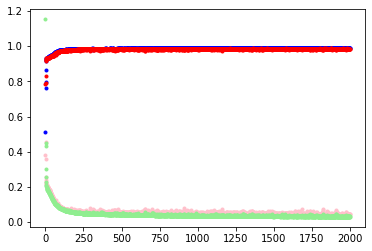

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model.selection import train_test_split
import pandas as pd
import numpy as np
import os 
import tensorflow as tf 
import matplotlilb.pyplot as plt

df_pre = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/wine.csv" , header = None)
# df의
df = df_pre.sample(frac = 1)
dataset = df.values
x = dataset[: , :12]
y = dataset[: , 12]

model = Sequential()
model.add(Dense(30 , input_dim = 12 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(8 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

# 여기서 testz_size는 30프로로 하겠다.
# 학습을 70%로 다하고 따로 제외시켜놓은 30%로 검증을 하겠다.라는 뜻임 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = seed) 
model_dir = "./model_wine/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = "./model_wine/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath , moniter = "val_loss" , verbose = 1 , save_best_only = True)

# 모델 실행 및 저장 
# validation_split을 위해 훈련 데이터의 일부를 자동으로 예약 할 데이터의 비율을 
# 나타내므로 0보다 크고 1보다 작은 숫자로 설정해야함
history = model.fit(x , y , validation_split = 0.33 , epochs = 2000 , batch_size = 500 , verbose = 0 , callbacks = [checkpointer])

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장 
y_vloss = history.history["val_loss"]
# y_acc에 학습셋으로 측정한 정확도의 값을 저장 
y_acc = history.history["accuracy"]

val_accuracy = history.history["val_accuracy"]

val_loss = history.history["loss"]

# x 값을 지정하고 accuracy를 파란색으로 , loss를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len , y_vloss , "o" , c = "pink" , markersize = 3)
plt.plot(x_len , y_acc , "o" , c = "blue" , markersize = 3)
plt.plot(x_len , val_accuracy , "o" , c = "red" , markersize = 3)
plt.plot(x_len , val_loss , "o" , c = "lightgreen" , markersize = 3)

plt.legend()
plt.show()

print("\n Train-Accuracy %.4f"%(model.evaluate(x_train , y_train)[1] * 100))
print("\n Test-Accuracy %.4f"%(model.evaluate(x_test , y_test)[1] * 100))


Epoch 00001: val_loss improved from inf to 0.69929, saving model to ./model_wine/01-0.6993.hdf5

Epoch 00002: val_loss improved from 0.69929 to 0.33941, saving model to ./model_wine/02-0.3394.hdf5

Epoch 00003: val_loss improved from 0.33941 to 0.30696, saving model to ./model_wine/03-0.3070.hdf5

Epoch 00004: val_loss improved from 0.30696 to 0.30578, saving model to ./model_wine/04-0.3058.hdf5

Epoch 00005: val_loss improved from 0.30578 to 0.28212, saving model to ./model_wine/05-0.2821.hdf5

Epoch 00006: val_loss improved from 0.28212 to 0.25962, saving model to ./model_wine/06-0.2596.hdf5

Epoch 00007: val_loss improved from 0.25962 to 0.24313, saving model to ./model_wine/07-0.2431.hdf5

Epoch 00008: val_loss improved from 0.24313 to 0.23359, saving model to ./model_wine/08-0.2336.hdf5

Epoch 00009: val_loss improved from 0.23359 to 0.22395, saving model to ./model_wine/09-0.2239.hdf5

Epoch 00010: val_loss improved from 0.22395 to 0.21840, saving model to ./model_wine/10-0.2184


Epoch 00093: val_loss improved from 0.09960 to 0.09910, saving model to ./model_wine/93-0.0991.hdf5

Epoch 00094: val_loss did not improve from 0.09910

Epoch 00095: val_loss improved from 0.09910 to 0.09877, saving model to ./model_wine/95-0.0988.hdf5

Epoch 00096: val_loss improved from 0.09877 to 0.09793, saving model to ./model_wine/96-0.0979.hdf5

Epoch 00097: val_loss did not improve from 0.09793

Epoch 00098: val_loss did not improve from 0.09793

Epoch 00099: val_loss did not improve from 0.09793

Epoch 00100: val_loss improved from 0.09793 to 0.09675, saving model to ./model_wine/100-0.0968.hdf5

Epoch 00101: val_loss improved from 0.09675 to 0.09504, saving model to ./model_wine/101-0.0950.hdf5

Epoch 00102: val_loss improved from 0.09504 to 0.09499, saving model to ./model_wine/102-0.0950.hdf5

Epoch 00103: val_loss improved from 0.09499 to 0.09464, saving model to ./model_wine/103-0.0946.hdf5

Epoch 00104: val_loss did not improve from 0.09464

Epoch 00105: val_loss did no


Epoch 00209: val_loss did not improve from 0.06874

Epoch 00210: val_loss did not improve from 0.06874

Epoch 00211: val_loss did not improve from 0.06874

Epoch 00212: val_loss did not improve from 0.06874

Epoch 00213: val_loss did not improve from 0.06874

Epoch 00214: val_loss improved from 0.06874 to 0.06860, saving model to ./model_wine/214-0.0686.hdf5

Epoch 00215: val_loss did not improve from 0.06860

Epoch 00216: val_loss did not improve from 0.06860

Epoch 00217: val_loss improved from 0.06860 to 0.06840, saving model to ./model_wine/217-0.0684.hdf5

Epoch 00218: val_loss did not improve from 0.06840

Epoch 00219: val_loss did not improve from 0.06840

Epoch 00220: val_loss did not improve from 0.06840

Epoch 00221: val_loss improved from 0.06840 to 0.06766, saving model to ./model_wine/221-0.0677.hdf5

Epoch 00222: val_loss improved from 0.06766 to 0.06744, saving model to ./model_wine/222-0.0674.hdf5

Epoch 00223: val_loss did not improve from 0.06744

Epoch 00224: val_lo


Epoch 00349: val_loss did not improve from 0.06224

Epoch 00350: val_loss did not improve from 0.06224

Epoch 00351: val_loss did not improve from 0.06224

Epoch 00352: val_loss did not improve from 0.06224

Epoch 00353: val_loss did not improve from 0.06224

Epoch 00354: val_loss did not improve from 0.06224

Epoch 00355: val_loss improved from 0.06224 to 0.06215, saving model to ./model_wine/355-0.0621.hdf5

Epoch 00356: val_loss did not improve from 0.06215

Epoch 00357: val_loss improved from 0.06215 to 0.06184, saving model to ./model_wine/357-0.0618.hdf5

Epoch 00358: val_loss did not improve from 0.06184

Epoch 00359: val_loss did not improve from 0.06184

Epoch 00360: val_loss did not improve from 0.06184

Epoch 00361: val_loss did not improve from 0.06184

Epoch 00362: val_loss did not improve from 0.06184

Epoch 00363: val_loss did not improve from 0.06184

Epoch 00364: val_loss did not improve from 0.06184

Epoch 00365: val_loss did not improve from 0.06184

Epoch 00366: va


Epoch 00495: val_loss did not improve from 0.05917

Epoch 00496: val_loss did not improve from 0.05917

Epoch 00497: val_loss did not improve from 0.05917

Epoch 00498: val_loss did not improve from 0.05917

Epoch 00499: val_loss did not improve from 0.05917

Epoch 00500: val_loss did not improve from 0.05917

Epoch 00501: val_loss did not improve from 0.05917

Epoch 00502: val_loss did not improve from 0.05917

Epoch 00503: val_loss improved from 0.05917 to 0.05899, saving model to ./model_wine/503-0.0590.hdf5

Epoch 00504: val_loss did not improve from 0.05899

Epoch 00505: val_loss did not improve from 0.05899

Epoch 00506: val_loss did not improve from 0.05899

Epoch 00507: val_loss did not improve from 0.05899

Epoch 00508: val_loss did not improve from 0.05899

Epoch 00509: val_loss did not improve from 0.05899

Epoch 00510: val_loss did not improve from 0.05899

Epoch 00511: val_loss did not improve from 0.05899

Epoch 00512: val_loss did not improve from 0.05899

Epoch 00513: 

No handles with labels found to put in legend.



Epoch 00631: val_loss did not improve from 0.05748

Epoch 00632: val_loss did not improve from 0.05748


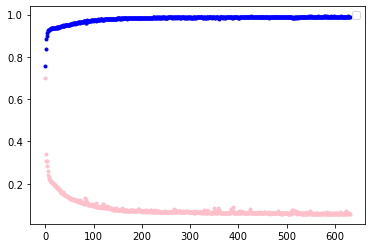

143/143 [==============================] - 1s 4ms/step - loss: 0.0437 - accuracy: 0.9886

 Train-Accuracy 98.8564
61/61 [==============================] - 0s 5ms/step - loss: 0.0381 - accuracy: 0.9913

 Test-Accuracy 99.1282


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os 
import tensorflow as tf 
import matplotlib.pyplot as plt

df_pre = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/wine.csv" , header = None)
# df의
df = df_pre.sample(frac = 1)
dataset = df.values
x = dataset[: , :12]
y = dataset[: , 12]

model = Sequential()
model.add(Dense(30 , input_dim = 12 , activation = "relu"))
model.add(Dense(12 , activation = "relu"))
model.add(Dense(8 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
# 자동 중단 설정 
# early_stopping 함수에 모니터할 값과 테스트 오차가 좋아지지 않아도 몇번까지 기다릴지를 정함
# 현재 코드에서는 정확도와 오차가 좋아지지 않는게 100번이 누적되면 거기서 학습을 종료
early_stopping_callback = EarlyStopping(monitor = "val_loss" , patience = 100)

# 여기서 testz_size는 30프로로 하겠다.
# 학습을 70%로 다하고 따로 제외시켜놓은 30%로 검증을 하겠다.라는 뜻임 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = seed) 
model_dir = "./model_wine/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = "./model_wine/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath , moniter = "val_loss" , verbose = 1 , save_best_only = True)

# 모델 실행 및 저장 
# validation_split을 위해 훈련 데이터의 일부를 자동으로 예약 할 데이터의 비율을 
# 나타내므로 0보다 크고 1보다 작은 숫자로 설정해야함
history = model.fit(x , y , validation_split = 0.33 , epochs = 3500 , batch_size = 500 , verbose = 0 , callbacks = [early_stopping_callback,checkpointer])

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장 

y_vloss = history.history["val_loss"]
# val_accuracy = history.history["val_accuracy"]

# y_acc에 학습셋으로 측정한 정확도의 값을 저장 
y_acc = history.history["accuracy"]
# val_loss = history.history["loss"]

# x 값을 지정하고 accuracy를 파란색으로 , loss를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len , y_vloss , "o" , c = "pink" , markersize = 3 , label = "val_loss")
plt.plot(x_len , y_acc , "o" , c = "blue" , markersize = 3 , label = "accuracy")
# plt.plot(x_len , val_accuracy , "o" , c = "red" , markersize = 3)
# plt.plot(x_len , val_loss , "o" , c = "lightgreen" , markersize = 3)

plt.legend()
plt.show()

print("\n Train-Accuracy %.4f"%(model.evaluate(x_train , y_train)[1] * 100))
print("\n Test-Accuracy %.4f"%(model.evaluate(x_test , y_test)[1] * 100))

## 이거 밑에거 개 중요함 박제 

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = seed) 
위 구문에서 

전체 데이터가 100% , train = 70 , test = 30 으로 
구분 < == 이 30프로는 evalutate할때 쓰겠다고 빼놓은 거임 

validation_split = 0.33 = 학습용 70%를 100%로 잡고 

그 중에서 67%로 학습을 하고 33%로 검증을 해서 학습을 할때마다 

loss 와 accuracy 를 출력해준다. 이말임

Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 0.9975 - accuracy: 0.3300 - val_loss: 0.9764 - val_accuracy: 0.4200
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9665 - accuracy: 0.5300 - val_loss: 0.9509 - val_accuracy: 0.7200
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.9448 - accuracy: 0.6200 - val_loss: 0.9351 - val_accuracy: 0.6800
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.9264 - accuracy: 0.5900 - val_loss: 0.9233 - val_accuracy: 0.6600
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9102 - accuracy: 0.5900 - val_loss: 0.9121 - val_accuracy: 0.6800
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8961 - accuracy: 0.5800 - val_loss: 0.9005 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8814 - accuracy: 0.4100 - val_loss: 0.8911 - val_accuracy: 0.4600
Epoch 8/100


Epoch 59/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.9200 - val_loss: 0.3597 - val_accuracy: 0.9200
Epoch 60/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4020 - accuracy: 0.9200 - val_loss: 0.3511 - val_accuracy: 0.9200
Epoch 61/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3947 - accuracy: 0.9000 - val_loss: 0.3403 - val_accuracy: 0.9200
Epoch 62/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3871 - accuracy: 0.8900 - val_loss: 0.3348 - val_accuracy: 0.9200
Epoch 63/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3742 - accuracy: 0.9400 - val_loss: 0.3208 - val_accuracy: 0.9400
Epoch 64/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3673 - accuracy: 0.9400 - val_loss: 0.3139 - val_accuracy: 0.9200
Epoch 65/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3607 - accuracy: 0.9400 - val_loss: 0.3025 - val_accuracy: 0.9400
Epoch 

findfont: Font family ['NanumBarunpenBold'] not found. Falling back to DejaVu Sans.


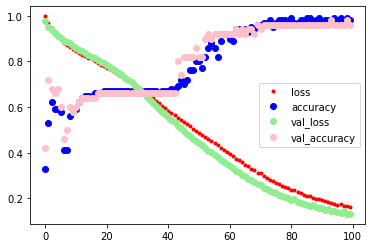

5/5 [==============================] - 0s 6ms/step - loss: 0.1493 - accuracy: 0.9733

 Accuracy 0.9733


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os 
import tensorflow as tf 
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
df_pre = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/iris.csv" , names = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width" , "species"])

df = df_pre.sample(frac = 1)

dataset = df.values

x = dataset[: , :4].astype(float)
y_obj = dataset[: , 4]

e = LabelEncoder()
e.fit(y_obj)
Y = e.transform(y_obj)
y = tf.keras.utils.to_categorical(Y)

early_stopping_callback = EarlyStopping(monitor = "val_loss" , patience = 100)

model = Sequential()
model.add(Dense(12 , input_dim = 4 , activation = "relu"))
model.add(Dense(10 , activation = "relu"))
model.add(Dense(3 , activation = "softmax"))

model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(x , y , validation_split = 0.33 , epochs = 100 , batch_size = 10 , verbose = 1 , callbacks = [early_stopping_callback] )

loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

x_len = np.arange(len(val_accuracy))

plt.plot(x_len , loss , "o" , c = "red" , markersize = 3 , label = "loss")
plt.plot(x_len , accuracy , "o" , c = "blue" , label = "accuracy")
plt.plot(x_len , val_loss , "o" , c = "lightgreen" , label = "val_loss")
plt.plot(x_len , val_accuracy , "o" , c = "pink" , label = "val_accuracy")

plt.legend()
plt.show()

print("\n Accuracy %.4f"%(model.evaluate(x , y)[1]))

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/panhong/Desktop/coding_study/Likelion_KDT/Jupyter_notebook/csv_file/data-02-stock_daily.csv" , header = 1)


fig = plt.figure(figsize = (30, 20))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(data["Open"])
ax1.plot(data["High"])
ax1.plot(data["Low"])
ax1.plot(data["Close"])
ax2.plot(data["Volume"])
ax3.plot(data["Open"][0:7] , linewidth = 3.0 , label = "open")
ax3.plot(data["High"][0:7] , linewidth = 3.0 , label = "High")
ax3.plot(data["Low"][0:7] , linewidth = 3.0 , label = "Low")
ax3.plot(data["Close"][0:7] , linewidth = 3.0 , label = "Close")
ax3.legend(prop = {"size" : 30})

xdata = data[["Open" , "High" , "Low" , "Volume"]]
ydata = pd.DataFrame(data["Close"])
xdata.plot.box(figsize = (5,5))
plt.show()

from sklearn.preprocessing import StandardScaler

xdata_ss = StandardScaler().fit_transform(xdata)
ydata_ss = StandardScaler().fit_transform(ydata)
print(xdata_ss.shape , ydata_ss.shape)
plt.boxplot(xdata_ss)
plt.show()

xtrain = xdata_ss[220: , :]
xtest = xdata_ss[:220 , :]
ytrain = xdata_ss[220: , :]
ytest = xdata_ss[:220 , :]

# xtrain , x_test , y_train , y_test = train_test_split(xdata_ss , y_data_ss , test_size = 0.1 , random_state = seed)

print(xtrain.shape , y_train.shape , xtest.shape , ytest.shape)

model = Sequential()
model.add(Dense(units = 1024 , input_dim = 4 , activation = "relu"))
model.add(Dense(units = 512 , activation = "relu"))
model.add(Dense(units = 256 , activation = "relu"))
model.add(Dense(units = 128 , activation = "relu"))
model.add(Dense(units = 64 , activation = "relu"))
model.add(Dense(units = 32 , activation = "relu"))
model.add(Dense(units = 1))

model.compile(loss = "mse" , optimizer = "adam" , metrics = ["mae"])

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = "mae" , patience = 10)
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)

hist = model.fit(x_train , y_train , epochs = 100 , batch_size = 10 , callbacks = [es])
print("loss" + str(hist.history["loss"]))
print("MAE" + str(hist.history["mae"]))

res = model.evaluate(xtest , ytest , batch_size = 32)
print("loss" , res[0] , "mae" , res[1])

xhat = xtest
yhat = model.predict(xhat)
plt.figure()
plt.plot(yhat , label = "predicted")
plt.plot(ytest , label = "actual")
plt.legend(prop = {"size" : 20})
print("Evaluate : {}".format(np.average((yhat - ytest)**2)))